In [11]:
import numpy as np

%matplotlib inline

In [12]:
# Load data prepared in 4.0 notMNIST preprocessing

save=np.load("notMNIST.save.npy")
save=save.tolist()
    
X_train_dataset=save['train_dataset']
Y_train_labels=save['train_labels']

X_test_dataset=save['test_dataset']
Y_test_labels=save['test_labels']

X_valid_dataset=save['valid_dataset']
Y_valid_labels=save['valid_labels']

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [3]:
# make sure they're right
print (X_train_dataset.shape)
print (Y_train_labels)
print (X_test_dataset.shape)
print (Y_test_labels)
print (X_valid_dataset.shape)
print (Y_valid_labels)

(200000, 28, 28)
[4 9 6 ..., 2 4 4]
(10000, 28, 28)
[3 6 4 ..., 6 9 0]
(10000, 28, 28)
[1 9 3 ..., 8 9 8]


J


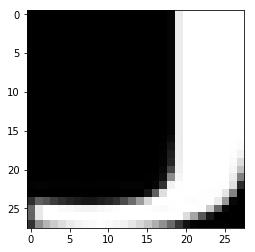

In [15]:
# visualize

sample_no=34

from matplotlib import pyplot as plt
plt.imshow(X_train_dataset[sample_no] , cmap='gray')
print (letters[Y_train_labels[sample_no]])

In [5]:
# Make sure tha data is normalized
X_train_dataset*=2
X_valid_dataset*=2
X_test_dataset*=2
for dataset in (X_train_dataset, X_valid_dataset, X_test_dataset):
    print ("min: {}, max{}".format(np.min(dataset),np.max(dataset)))


min: -1.0, max1.0
min: -1.0, max1.0
min: -1.0, max1.0


In [6]:
import keras.utils as utils

# reshape to (N, 1, 28,28), equivalnet to X[:,None,:,:]
X_train_dataset = X_train_dataset.reshape(X_train_dataset.shape[0], 1, 28, 28)
X_valid_dataset = X_valid_dataset.reshape(X_valid_dataset.shape[0], 1, 28, 28)
X_test_dataset = X_test_dataset.reshape(X_test_dataset.shape[0], 1, 28, 28)

# Convert 1-dimensional class arrays to 10-dimensional class matrices (one-hot)
Y_train_labels = utils.to_categorical(Y_train_labels, 10)
Y_valid_labels = utils.to_categorical(Y_valid_labels, 10)
Y_test_labels = utils.to_categorical(Y_test_labels, 10)


Using TensorFlow backend.


In [7]:
X_train_dataset.shape

(200000, 1, 28, 28)

### Fully connected model
Let's first try classic fullyconected model cosisting of two hidden layers followed by softmax activation function.

In [8]:
from keras.layers import Input, Dense, Reshape
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(1,28,28,))
inputs_r = Reshape(target_shape=(784,))(inputs)
# a layer instance is callable on a tensor, and returns a tensor
x = Dense(512, activation='relu')(inputs_r)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train_dataset, Y_train_labels, validation_data=(X_valid_dataset, Y_valid_labels),
          batch_size=16384, epochs=20)

Train on 200000 samples, validate on 10000 samples
Epoch 1/20
200000/200000 [==============================] - 2s - loss: 1.0660 - acc: 0.6538 - val_loss: 0.6637 - val_acc: 0.8031
Epoch 2/20
200000/200000 [==============================] - 1s - loss: 0.6125 - acc: 0.8173 - val_loss: 0.6423 - val_acc: 0.8031
Epoch 3/20
200000/200000 [==============================] - 1s - loss: 0.5793 - acc: 0.8251 - val_loss: 0.5929 - val_acc: 0.8196
Epoch 4/20
200000/200000 [==============================] - 1s - loss: 0.5268 - acc: 0.8400 - val_loss: 0.5120 - val_acc: 0.8445
Epoch 5/20
200000/200000 [==============================] - 1s - loss: 0.5099 - acc: 0.8444 - val_loss: 0.4901 - val_acc: 0.8516
Epoch 6/20
200000/200000 [==============================] - 1s - loss: 0.4847 - acc: 0.8521 - val_loss: 0.4986 - val_acc: 0.8490
Epoch 7/20
200000/200000 [==============================] - 1s - loss: 0.4696 - acc: 0.8566 - val_loss: 0.4591 - val_acc: 0.8612
Epoch 8/20
200000/200000 [====================

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])


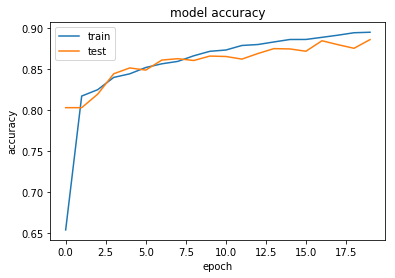

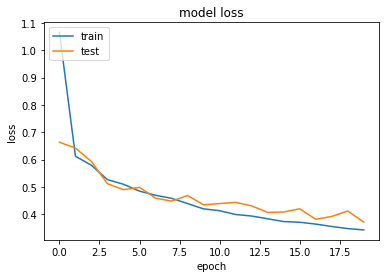

In [10]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score_test = model.evaluate(X_test_dataset, Y_test_labels, verbose=1)


 9536/10000 [===========================>..] - ETA: 0s

In [12]:
print("%s: %.2f%%" % (model.metrics_names[1], score_test[1]*100))

acc: 94.02%


### Convolutional module
Now we try convolutional model cosisting of two Conv layers followed by softmax activation function.

This model utilizes Dropdown to fight overfitting.

In [14]:
save=np.load("notMNIST.save.npy")
save=save.tolist()

X_train_dataset=save['train_dataset']
Y_train_labels=save['train_labels']

X_test_dataset=save['test_dataset']
Y_test_labels=save['test_labels']

X_valid_dataset=save['valid_dataset']
Y_valid_labels=save['valid_labels']

if np.min(X_train_dataset)<0:
    X_train_dataset+=0.5
    X_valid_dataset+=0.5
    X_test_dataset+=0.5
for dataset in (X_train_dataset, X_valid_dataset, X_test_dataset):
    print ("min: {}, max: {}".format(np.min(dataset),np.max(dataset)))
    
import keras.utils as utils
# reshape to (N, 1, 28,28), equivalnet to X[:,None,:,:]
X_train_dataset = X_train_dataset.reshape(X_train_dataset.shape[0], 1, 28, 28)
X_valid_dataset = X_valid_dataset.reshape(X_valid_dataset.shape[0], 1, 28, 28)
X_test_dataset = X_test_dataset.reshape(X_test_dataset.shape[0], 1, 28, 28)

# Convert 1-dimensional class arrays to 10-dimensional class matrices (one-hot)
Y_train_labels = utils.to_categorical(Y_train_labels, 10)
Y_valid_labels = utils.to_categorical(Y_valid_labels, 10)
Y_test_labels = utils.to_categorical(Y_test_labels, 10)

min: 0.0, max: 1.0
min: 0.0, max: 1.0
min: 0.0, max: 1.0


In [7]:
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dropout, Reshape, Dense
from keras.models import Sequential

model = Sequential()
model.add(Reshape(target_shape=(28,28,1,),input_shape=(1,28,28)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [8]:
history=model.fit(X_train_dataset, Y_train_labels, validation_data=(X_valid_dataset, Y_valid_labels),
          batch_size=128, epochs=20)

Train on 200000 samples, validate on 10000 samples
Epoch 1/20
200000/200000 [==============================] - 21s - loss: 0.4860 - acc: 0.8558 - val_loss: 0.3303 - val_acc: 0.9033
Epoch 2/20
200000/200000 [==============================] - 18s - loss: 0.3681 - acc: 0.8891 - val_loss: 0.2948 - val_acc: 0.9140
Epoch 3/20
200000/200000 [==============================] - 18s - loss: 0.3329 - acc: 0.8991 - val_loss: 0.2784 - val_acc: 0.9173
Epoch 4/20
200000/200000 [==============================] - 18s - loss: 0.3081 - acc: 0.9049 - val_loss: 0.2688 - val_acc: 0.9207
Epoch 5/20
200000/200000 [==============================] - 18s - loss: 0.2883 - acc: 0.9106 - val_loss: 0.2634 - val_acc: 0.9216
Epoch 6/20
200000/200000 [==============================] - 18s - loss: 0.2733 - acc: 0.9147 - val_loss: 0.2561 - val_acc: 0.9246
Epoch 7/20
200000/200000 [==============================] - 18s - loss: 0.2571 - acc: 0.9186 - val_loss: 0.2530 - val_acc: 0.9268
Epoch 8/20
200000/200000 [=============

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


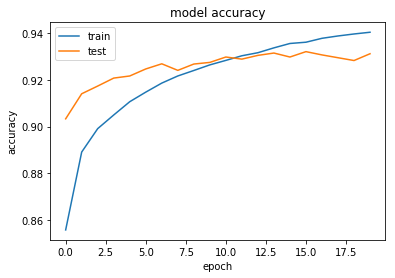

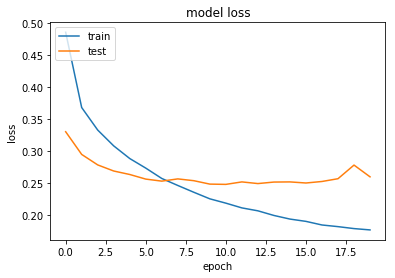

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
score_test = model.evaluate(X_test_dataset, Y_test_labels, verbose=1)


10000/10000 [==============================] - 0s     


In [13]:
print("%s: %.2f%%" % (model.metrics_names[1], score_test[1]*100))

acc: 97.17%


### Inception module based model
The last model utilizes Inception module to build the classifier.

You may take an excercise to tweak it to match or beat simple Conv module from above.

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Input,  Flatten, Dropout, Reshape, Dense, BatchNormalization
from keras.layers import concatenate
from keras.models import Model, Sequential

inputs = Input(shape=(1,28,28,))
input_img = Reshape(target_shape=(28,28,1,),input_shape=(1,28,28))(inputs)

# Inceptiom module 1

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = Concatenate(axis=1)([tower_1, tower_2, tower_3])


output = MaxPooling2D(pool_size=(2, 2))(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Flatten()(output)
output = Dense(64, activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(10, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

# Final classifier

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_16 (InputLayer)            (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
reshape_17 (Reshape)             (None, 28, 28, 1)     0           input_16[0][0]                   
____________________________________________________________________________________________________
conv2d_107 (Conv2D)              (None, 28, 28, 64)    128         reshape_17[0][0]                 
____________________________________________________________________________________________________
conv2d_109 (Conv2D)              (None, 28, 28, 64)    128         reshape_17[0][0]                 
___________________________________________________________________________________________

In [28]:
history=model.fit(X_train_dataset, Y_train_labels, validation_data=(X_valid_dataset, Y_valid_labels),
          batch_size=128, epochs=20)

Train on 200000 samples, validate on 10000 samples
Epoch 1/20
200000/200000 [==============================] - 59s - loss: 0.4285 - acc: 0.8772 - val_loss: 0.3282 - val_acc: 0.9050
Epoch 2/20
200000/200000 [==============================] - 58s - loss: 0.3310 - acc: 0.9018 - val_loss: 0.2972 - val_acc: 0.9118
Epoch 3/20
200000/200000 [==============================] - 58s - loss: 0.2958 - acc: 0.9105 - val_loss: 0.2872 - val_acc: 0.9165
Epoch 4/20
200000/200000 [==============================] - 57s - loss: 0.2660 - acc: 0.9184 - val_loss: 0.2727 - val_acc: 0.9215
Epoch 5/20
200000/200000 [==============================] - 56s - loss: 0.2423 - acc: 0.9250 - val_loss: 0.2771 - val_acc: 0.9189
Epoch 6/20
200000/200000 [==============================] - 56s - loss: 0.2203 - acc: 0.9314 - val_loss: 0.2765 - val_acc: 0.9225
Epoch 7/20
200000/200000 [==============================] - 56s - loss: 0.2015 - acc: 0.9359 - val_loss: 0.2736 - val_acc: 0.9217
Epoch 8/20
200000/200000 [=============

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


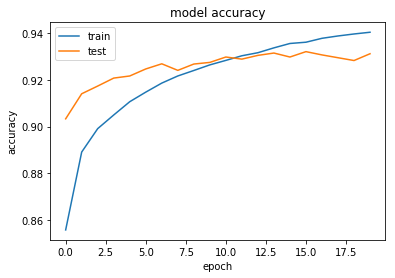

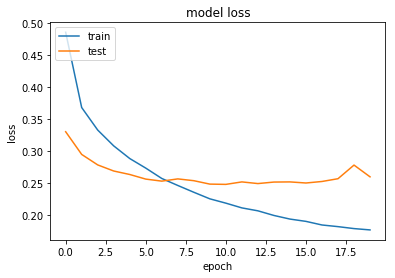

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
score_test = model.evaluate(X_test_dataset, Y_test_labels, verbose=1)


 9920/10000 [============================>.] - ETA: 0s

In [30]:
print("%s: %.2f%%" % (model.metrics_names[1], score_test[1]*100))

acc: 96.75%
